In [88]:
cd /kaggle/input/coronahack-respiratory-sound-dataset/CoronaHack-Respiratory-Sound-Dataset/

/kaggle/input/coronahack-respiratory-sound-dataset/CoronaHack-Respiratory-Sound-Dataset


In [89]:
ls

Corona-Hack-Respiratory-Sound-Metadata.csv  data/


In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import os
import shutil
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.preprocessing import LabelBinarizer
import pickle
import cv2
import json

In [91]:
df = pd.read_csv("Corona-Hack-Respiratory-Sound-Metadata.csv",encoding='latin1')

df.head()


,USER_ID,COUNTRY,AGE,COVID_STATUS,ENGLISH_PROFICIENCY,GENDER,COUNTY_RO_STATE,CITY_LOCALITY,Diabetes,Asthma,...,DATES,breathing-deep,breathing-shallow,cough-heavy,cough-shallow,counting-fast,counting-normal,vowel-a,vowel-e,vowel-o
0,vK2bLRNzllXNeyOMudnNSL5cfpG2,India,24,healthy,Y,M,Karnataka,Bangalore,0,0,...,20200413,/data/train/20200413/vK2bLRNzllXNeyOMudnNSL5cf...,/data/train/20200413/vK2bLRNzllXNeyOMudnNSL5cf...,/data/train/20200413/vK2bLRNzllXNeyOMudnNSL5cf...,/data/train/20200413/vK2bLRNzllXNeyOMudnNSL5cf...,/data/train/20200413/vK2bLRNzllXNeyOMudnNSL5cf...,/data/train/20200413/vK2bLRNzllXNeyOMudnNSL5cf...,/data/train/20200413/vK2bLRNzllXNeyOMudnNSL5cf...,/data/train/20200413/vK2bLRNzllXNeyOMudnNSL5cf...,/data/train/20200413/vK2bLRNzllXNeyOMudnNSL5cf...
1,bjA2KpSxneNskrLBeqi4bqoTDQl2,India,72,healthy,Y,M,Maharashtra,Thane,0,0,...,20200413,/data/train/20200413/bjA2KpSxneNskrLBeqi4bqoTD...,/data/train/20200413/bjA2KpSxneNskrLBeqi4bqoTD...,/data/train/20200413/bjA2KpSxneNskrLBeqi4bqoTD...,/data/train/20200413/bjA2KpSxneNskrLBeqi4bqoTD...,/data/train/20200413/bjA2KpSxneNskrLBeqi4bqoTD...,/data/train/20200413/bjA2KpSxneNskrLBeqi4bqoTD...,/data/train/20200413/bjA2KpSxneNskrLBeqi4bqoTD...,/data/train/20200413/bjA2KpSxneNskrLBeqi4bqoTD...,/data/train/20200413/bjA2KpSxneNskrLBeqi4bqoTD...
2,FSzobvJqOXf0rI6X05cHqOiU9Mu2,India,54,healthy,Y,M,Maharashtra,Thane West,0,0,...,20200413,/data/train/20200413/FSzobvJqOXf0rI6X05cHqOiU9...,/data/train/20200413/FSzobvJqOXf0rI6X05cHqOiU9...,/data/train/20200413/FSzobvJqOXf0rI6X05cHqOiU9...,/data/train/20200413/FSzobvJqOXf0rI6X05cHqOiU9...,/data/train/20200413/FSzobvJqOXf0rI6X05cHqOiU9...,/data/train/20200413/FSzobvJqOXf0rI6X05cHqOiU9...,/data/train/20200413/FSzobvJqOXf0rI6X05cHqOiU9...,/data/train/20200413/FSzobvJqOXf0rI6X05cHqOiU9...,/data/train/20200413/FSzobvJqOXf0rI6X05cHqOiU9...
3,EqDWckxbsETyHUeBLQ8jLtxlhir2,India,31,healthy,Y,M,Karnataka,Bangalore,0,0,...,20200413,/data/train/20200413/EqDWckxbsETyHUeBLQ8jLtxlh...,/data/train/20200413/EqDWckxbsETyHUeBLQ8jLtxlh...,/data/train/20200413/EqDWckxbsETyHUeBLQ8jLtxlh...,/data/train/20200413/EqDWckxbsETyHUeBLQ8jLtxlh...,/data/train/20200413/EqDWckxbsETyHUeBLQ8jLtxlh...,/data/train/20200413/EqDWckxbsETyHUeBLQ8jLtxlh...,/data/train/20200413/EqDWckxbsETyHUeBLQ8jLtxlh...,/data/train/20200413/EqDWckxbsETyHUeBLQ8jLtxlh...,/data/train/20200413/EqDWckxbsETyHUeBLQ8jLtxlh...
4,FGRDO4IBbAejR0WHD5YbkXTCasg2,India,26,healthy,Y,M,Haryana,gurgaon,0,0,...,20200413,/data/train/20200413/FGRDO4IBbAejR0WHD5YbkXTCa...,/data/train/20200413/FGRDO4IBbAejR0WHD5YbkXTCa...,/data/train/20200413/FGRDO4IBbAejR0WHD5YbkXTCa...,/data/train/20200413/FGRDO4IBbAejR0WHD5YbkXTCa...,/data/train/20200413/FGRDO4IBbAejR0WHD5YbkXTCa...,/data/train/20200413/FGRDO4IBbAejR0WHD5YbkXTCa...,/data/train/20200413/FGRDO4IBbAejR0WHD5YbkXTCa...,/data/train/20200413/FGRDO4IBbAejR0WHD5YbkXTCa...,/data/train/20200413/FGRDO4IBbAejR0WHD5YbkXTCa...


In [92]:
df.drop('COUNTRY', axis=1, inplace=True)
df.drop('GENDER', axis=1, inplace=True)
df.drop('COUNTY_RO_STATE', axis=1, inplace=True)
df.drop('CITY_LOCALITY', axis=1, inplace=True)
df.drop('ENGLISH_PROFICIENCY', axis=1, inplace=True)
df.drop('AGE', axis=1, inplace=True)
df.drop('DATES', axis=1, inplace=True)


In [93]:
df.head()

,USER_ID,COVID_STATUS,Diabetes,Asthma,Smoker,Hypertension,Fever,Returning_User,Using_Mask,Cold,...,Diarrheoa,breathing-deep,breathing-shallow,cough-heavy,cough-shallow,counting-fast,counting-normal,vowel-a,vowel-e,vowel-o
0,vK2bLRNzllXNeyOMudnNSL5cfpG2,healthy,0,0,0,0,0,0,0,0,...,0,/data/train/20200413/vK2bLRNzllXNeyOMudnNSL5cf...,/data/train/20200413/vK2bLRNzllXNeyOMudnNSL5cf...,/data/train/20200413/vK2bLRNzllXNeyOMudnNSL5cf...,/data/train/20200413/vK2bLRNzllXNeyOMudnNSL5cf...,/data/train/20200413/vK2bLRNzllXNeyOMudnNSL5cf...,/data/train/20200413/vK2bLRNzllXNeyOMudnNSL5cf...,/data/train/20200413/vK2bLRNzllXNeyOMudnNSL5cf...,/data/train/20200413/vK2bLRNzllXNeyOMudnNSL5cf...,/data/train/20200413/vK2bLRNzllXNeyOMudnNSL5cf...
1,bjA2KpSxneNskrLBeqi4bqoTDQl2,healthy,0,0,0,0,0,0,0,0,...,0,/data/train/20200413/bjA2KpSxneNskrLBeqi4bqoTD...,/data/train/20200413/bjA2KpSxneNskrLBeqi4bqoTD...,/data/train/20200413/bjA2KpSxneNskrLBeqi4bqoTD...,/data/train/20200413/bjA2KpSxneNskrLBeqi4bqoTD...,/data/train/20200413/bjA2KpSxneNskrLBeqi4bqoTD...,/data/train/20200413/bjA2KpSxneNskrLBeqi4bqoTD...,/data/train/20200413/bjA2KpSxneNskrLBeqi4bqoTD...,/data/train/20200413/bjA2KpSxneNskrLBeqi4bqoTD...,/data/train/20200413/bjA2KpSxneNskrLBeqi4bqoTD...
2,FSzobvJqOXf0rI6X05cHqOiU9Mu2,healthy,0,0,0,0,0,0,0,0,...,0,/data/train/20200413/FSzobvJqOXf0rI6X05cHqOiU9...,/data/train/20200413/FSzobvJqOXf0rI6X05cHqOiU9...,/data/train/20200413/FSzobvJqOXf0rI6X05cHqOiU9...,/data/train/20200413/FSzobvJqOXf0rI6X05cHqOiU9...,/data/train/20200413/FSzobvJqOXf0rI6X05cHqOiU9...,/data/train/20200413/FSzobvJqOXf0rI6X05cHqOiU9...,/data/train/20200413/FSzobvJqOXf0rI6X05cHqOiU9...,/data/train/20200413/FSzobvJqOXf0rI6X05cHqOiU9...,/data/train/20200413/FSzobvJqOXf0rI6X05cHqOiU9...
3,EqDWckxbsETyHUeBLQ8jLtxlhir2,healthy,0,0,0,0,0,0,0,0,...,0,/data/train/20200413/EqDWckxbsETyHUeBLQ8jLtxlh...,/data/train/20200413/EqDWckxbsETyHUeBLQ8jLtxlh...,/data/train/20200413/EqDWckxbsETyHUeBLQ8jLtxlh...,/data/train/20200413/EqDWckxbsETyHUeBLQ8jLtxlh...,/data/train/20200413/EqDWckxbsETyHUeBLQ8jLtxlh...,/data/train/20200413/EqDWckxbsETyHUeBLQ8jLtxlh...,/data/train/20200413/EqDWckxbsETyHUeBLQ8jLtxlh...,/data/train/20200413/EqDWckxbsETyHUeBLQ8jLtxlh...,/data/train/20200413/EqDWckxbsETyHUeBLQ8jLtxlh...
4,FGRDO4IBbAejR0WHD5YbkXTCasg2,healthy,0,0,0,0,0,0,0,0,...,0,/data/train/20200413/FGRDO4IBbAejR0WHD5YbkXTCa...,/data/train/20200413/FGRDO4IBbAejR0WHD5YbkXTCa...,/data/train/20200413/FGRDO4IBbAejR0WHD5YbkXTCa...,/data/train/20200413/FGRDO4IBbAejR0WHD5YbkXTCa...,/data/train/20200413/FGRDO4IBbAejR0WHD5YbkXTCa...,/data/train/20200413/FGRDO4IBbAejR0WHD5YbkXTCa...,/data/train/20200413/FGRDO4IBbAejR0WHD5YbkXTCa...,/data/train/20200413/FGRDO4IBbAejR0WHD5YbkXTCa...,/data/train/20200413/FGRDO4IBbAejR0WHD5YbkXTCa...


In [94]:
columns_to_count = df.columns[1:-9]

for column_to_count in columns_to_count:
    label_counts = df[column_to_count].value_counts()
    print("-----------------------------------------------------------------------------------")
    print(f"Số lượng mỗi nhãn trong cột {column_to_count}:\n{label_counts}\n")

-----------------------------------------------------------------------------------
Số lượng mỗi nhãn trong cột COVID_STATUS:
COVID_STATUS
healthy                        1162
no_resp_illness_exposed          90
resp_illness_not_identified      78
positive_mild                    38
positive_asymp                   11
recovered_full                   10
positive_moderate                 7
ñ                                 1
Name: count, dtype: int64

-----------------------------------------------------------------------------------
Số lượng mỗi nhãn trong cột Diabetes:
Diabetes
0    1319
1      78
Name: count, dtype: int64

-----------------------------------------------------------------------------------
Số lượng mỗi nhãn trong cột Asthma:
Asthma
0    1335
1      62
Name: count, dtype: int64

-----------------------------------------------------------------------------------
Số lượng mỗi nhãn trong cột Smoker:
Smoker
0    1290
1     107
Name: count, dtype: int64

--------------------

In [95]:
def show_history():

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 1)
    plt.legend()

    plt.show()
    plt.close()

/opt/conda/lib/python3.10/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


(224, 224)


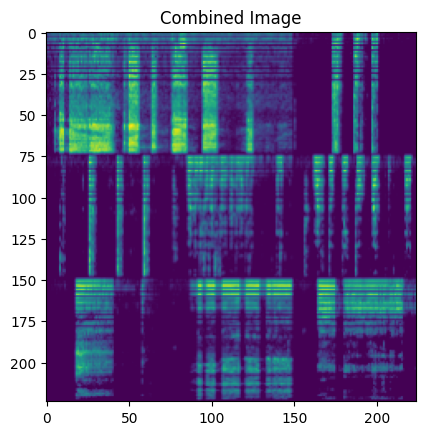

In [96]:
duration = 5
time_limit = duration
sr = 16000
n_fft = 256
n_mels= 128
hop_length = 256
output_size = (75,75,1)

num_columns = 3
num_rows = 3 

audio_files = [
    "data/train/20200413/0Rlzhiz6bybk77wdLjxwy7yLDhg1/breathing-deep.wav",
    "data/train/20200413/0Rlzhiz6bybk77wdLjxwy7yLDhg1/breathing-shallow.wav",
    "data/train/20200413/0Rlzhiz6bybk77wdLjxwy7yLDhg1/cough-heavy.wav",
    "data/train/20200413/0Rlzhiz6bybk77wdLjxwy7yLDhg1/cough-shallow.wav",
    "data/train/20200413/0Rlzhiz6bybk77wdLjxwy7yLDhg1/counting-fast.wav",
    "data/train/20200413/0Rlzhiz6bybk77wdLjxwy7yLDhg1/counting-normal.wav",
    "data/train/20200413/0Rlzhiz6bybk77wdLjxwy7yLDhg1/vowel-a.wav",
    "data/train/20200413/0Rlzhiz6bybk77wdLjxwy7yLDhg1/vowel-e.wav",
    "data/train/20200413/0Rlzhiz6bybk77wdLjxwy7yLDhg1/vowel-o.wav"
]

num_files = len(audio_files)

all_images = []

for i, audio_file in enumerate(audio_files, start=1):
    
    audio, sr = librosa.load(audio_file, sr=sr, duration=duration)
    mel_spectrogram = librosa.feature.melspectrogram(
        y=audio, sr=sr, n_fft=n_fft, n_mels=n_mels, hop_length=hop_length
    )
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    mel_spectrogram_db = mel_spectrogram_db + np.abs(np.min(mel_spectrogram_db))
    mel_spectrogram_db = cv2.resize(mel_spectrogram_db, output_size[:2])

    all_images.append(mel_spectrogram_db)

row1_images = all_images[:3]
row2_images = all_images[3:6]
row3_images = all_images[6:]

final_image1 = np.hstack(row1_images)
final_image2 = np.hstack(row2_images)
final_image3 = np.hstack(row3_images)

final_image = np.vstack([final_image1, final_image2, final_image3])
final_image = cv2.resize(final_image, (224,224))
print(np.array(final_image).shape)
plt.imshow(final_image)
plt.title('Combined Image')
plt.show()
plt.close()


In [97]:

def get_data(audio_files,sr=sr,time_limit=time_limit,n_fft = 512,
n_mels= 128,
hop_length = 256,
output_size = (75,75,1),
output_img  = (224,224,1)):
    num_columns = 3
    num_rows = 3 
    num_files = len(audio_files)

    all_images = []

    for i, audio_file in enumerate(audio_files, start=1):

        audio, sr = librosa.load(audio_file, sr=sr, duration=duration)
        mel_spectrogram = librosa.feature.melspectrogram(
            y=audio, sr=sr, n_fft=n_fft, n_mels=n_mels, hop_length=hop_length
        )
        mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
        mel_spectrogram_db = mel_spectrogram_db + np.abs(np.min(mel_spectrogram_db))
        mel_spectrogram_db = cv2.resize(mel_spectrogram_db, output_size[:2])
        
        all_images.append(mel_spectrogram_db)

    row1_images = all_images[:3]
    row2_images = all_images[3:6]
    row3_images = all_images[6:]
    
    final_image1 = np.hstack(row1_images)
    final_image2 = np.hstack(row2_images)
    final_image3 = np.hstack(row3_images)
  
#     print(np.array(final_image1).shape,np.array(final_image2).shape,np.array(final_image3).shape)
    
    final_image = np.vstack([final_image1, final_image2, final_image3])
    final_image = cv2.resize(final_image, output_img[:2])
    final_image= np.reshape(final_image,output_img)
    x_data.append(final_image)
    

In [98]:
folders = "data/train/"
x_data = []
y_data = []
for folder in os.listdir(folders):
    link_folders = os.path.join(folders,folder)  
    for id_folder in os.listdir(link_folders):
        id_patient = os.path.join(link_folders,id_folder)
        if(id_folder != '20200419.csv'):
            audio_files = []
#             print(id_patient)
            for file in os.listdir(id_patient):

                link_file = os.path.join(id_patient,file)
                if(link_file[-3:] == 'wav'):
                    audio_files.append(link_file)
                elif(link_file[-3:] == 'son'):
                    file_json = link_file
#                     print(file_json)
            if(len(audio_files)==9):
                with open(file_json, 'r') as file_json:
                    label = json.load(file_json)
                y_data.append(label['covid_status'])
                get_data(audio_files)
x_train = np.array(x_data)
y_train = np.array(y_data)

/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=0
  warnings.warn(


In [99]:
folders = "data/test/"
x_data = []
y_data = []
for folder in os.listdir(folders):
    link_folders = os.path.join(folders,folder)  
    for id_folder in os.listdir(link_folders):
        id_patient = os.path.join(link_folders,id_folder)
        if(id_folder != '20200419.csv'):
            audio_files = []
#             print(id_patient)
            for file in os.listdir(id_patient):

                link_file = os.path.join(id_patient,file)
                if(link_file[-3:] == 'wav'):
                    audio_files.append(link_file)
                elif(link_file[-3:] == 'son'):
                    file_json = link_file
#                     print(file_json)
            if(len(audio_files)==9):
                with open(file_json, 'r') as file_json:
                    label = json.load(file_json)
                y_data.append(label['covid_status'])
                get_data(audio_files)
x_val = np.array(x_data)
y_val = np.array(y_data)

In [100]:
file = open('/kaggle/working/data_spectrogram.csv','wb')
pickle.dump((x_train,x_val,y_train,y_val),file)
file.close()

del x_train,x_val,y_train,y_val

In [101]:
file = open('/kaggle/working/data_spectrogram.csv', 'rb')
x_train,x_val,y_train,y_val = pickle.load(file)
file.close()

In [102]:
x_train = np.concatenate([x_train, x_train, x_train], axis=-1)
x_val = np.concatenate([x_val, x_val, x_val], axis=-1)

In [103]:
print(x_train.shape)
print(x_val.shape)

(1154, 224, 224, 3)
(240, 224, 224, 3)


In [104]:
encoder = LabelBinarizer()
y_train =encoder.fit_transform(y_train)
y_val =encoder.fit_transform(y_val)
x_val,x_test,y_val,y_test = train_test_split(x_val,y_val,test_size=0.3,random_state=5)

In [105]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_val = np.array(x_val)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(1154, 224, 224, 3)
(168, 224, 224, 3)
(72, 224, 224, 3)


In [106]:
input_shape = (x_test[1]).shape
input_shape

(224, 224, 3)

In [110]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from keras.applications import ResNet50
from keras.optimizers import Adam,Nadam,SGD


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

model = Sequential()
model.add(base_model)
model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))


model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_hinge', metrics=['accuracy'])
model_checkpoint = ModelCheckpoint('/kaggle/working/best_model_ResNet50.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_1 (Dense)             (None, 7)                 702471    
                                                                 
Total params: 24290183 (92.66 MB)
Trainable params: 24237063 (92.46 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [ ]:
history = model.fit(x_train,y_train,batch_size=256,epochs=100,validation_data=(x_val, y_val),shuffle=True, callbacks=[model_checkpoint])
show_history()

Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 0.5360 - accuracy: 0.6880  
Epoch 1: val_accuracy improved from -inf to 0.68452, saving model to /kaggle/working/best_model_ResNet50.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 468s 88s/step - loss: 0.5360 - accuracy: 0.6880 - val_loss: 0.6310 - val_accuracy: 0.6845
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 0.2600 - accuracy: 0.8700  
Epoch 2: val_accuracy did not improve from 0.68452
5/5 [==============================] - 478s 96s/step - loss: 0.2600 - accuracy: 0.8700 - val_loss: 0.6310 - val_accuracy: 0.6845
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 0.2600 - accuracy: 0.8700  
Epoch 3: val_accuracy did not improve from 0.68452
5/5 [==============================] - 478s 95s/step - loss: 0.2600 - accuracy: 0.8700 - val_loss: 0.6310 - val_accuracy: 0.6845
Epoch 4/100
5/5 [==============================] - ETA: 0s - loss: 0.2600 - accuracy: 0.8700  
Epoch 4: val_accuracy did not improve from 0.68452
5/5 [==============================] - 453s 88s/step - loss: 0.2600 - accuracy: 0.8700 - val_loss: 0.6310 - val_accuracy: 0.6845
Epoch 5/100
5/5 [=============================

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np


model = load_model('/kaggle/working/best_model_ResNet101.h5') 



predictions = model.predict(x_test)


loss, accuracy = model.evaluate(x_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_classes = np.argmax(predictions, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_mat = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
plt.close()

del y_pred_classes
del y_true_classes
del predictions
del model
del loss
del accuracy